In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

### Objective: Understand the thematic trends associated with oil well cost components associated with some regions in the United States and develop informed predictions on the same.
## Datasets Provided:
### • Enverus Market Indices
###  Category: Well Cost Category of Spend
### o Sub-Category: Subcategory of Well Cost Category
### o Index: Normalized Price trends. Normalized to 100 value for January 2018.
### o Phigh: 75th Percentile value, also benchmarked to the Index Baseline.
### o Plow: 25th Percentile value, also benchmarked to the Index Baseline.


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Jitendar1991/Oil-and-gas/main/Data%20for%20Case%20Study.csv",index_col="Date"
               ,parse_dates=["Date"])

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
df.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01',
               ...
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01'],
              dtype='datetime64[ns]', name='Date', length=4524, freq=None)

In [5]:
df.head()

Index Category        Sub Category       Region   Plow    Index   \
Date                                                                          
2018-01-01         Cement  Cement Price Index  Appalachian   31.52   100.00   
2018-02-01         Cement  Cement Price Index  Appalachian   31.01   100.75   
2018-03-01         Cement  Cement Price Index  Appalachian   30.35   100.87   
2018-04-01         Cement  Cement Price Index  Appalachian   29.61   100.57   
2018-05-01         Cement  Cement Price Index  Appalachian   28.80   102.17   

             Phigh               type  
Date                                   
2018-01-01   158.35  Normalized Price  
2018-02-01   159.21  Normalized Price  
2018-03-01   161.99  Normalized Price  
2018-04-01   160.39  Normalized Price  
2018-05-01   160.23  Normalized Price

In [6]:
df.info()
#Data types and also we can see there is no Null value in our data


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4524 entries, 2018-01-01 to 2022-04-01
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index Category  4524 non-null   object 
 1   Sub Category    4524 non-null   object 
 2   Region          4524 non-null   object 
 3    Plow           4524 non-null   float64
 4    Index          4524 non-null   float64
 5    Phigh          4524 non-null   float64
 6   type            4524 non-null   object 
dtypes: float64(3), object(4)
memory usage: 282.8+ KB


In [7]:
df.head()

Index Category        Sub Category       Region   Plow    Index   \
Date                                                                          
2018-01-01         Cement  Cement Price Index  Appalachian   31.52   100.00   
2018-02-01         Cement  Cement Price Index  Appalachian   31.01   100.75   
2018-03-01         Cement  Cement Price Index  Appalachian   30.35   100.87   
2018-04-01         Cement  Cement Price Index  Appalachian   29.61   100.57   
2018-05-01         Cement  Cement Price Index  Appalachian   28.80   102.17   

             Phigh               type  
Date                                   
2018-01-01   158.35  Normalized Price  
2018-02-01   159.21  Normalized Price  
2018-03-01   161.99  Normalized Price  
2018-04-01   160.39  Normalized Price  
2018-05-01   160.23  Normalized Price

In [8]:
df.describe()

Plow        Index        Phigh 
count  4524.000000  4524.000000  4524.000000
mean     78.355802   103.623691   140.714052
std      23.198859    33.392147    58.592580
min      19.510000    38.790000    40.850000
25%      65.332500    90.932500   111.257500
50%      80.585000   100.730000   127.565000
75%      92.610000   112.372500   157.832500
max     201.440000   522.150000   768.100000

In [9]:
df.columns
#we can see spaces in some columns like " plow ", " Index "," Phigh " so we need to remove these spaces

Index(['Index Category', 'Sub Category', 'Region', ' Plow ', ' Index ',
       ' Phigh ', 'type'],
      dtype='object')

In [10]:
df.columns=df.columns.str.strip()
#'''strip leading and trailing space'''

In [11]:
df.columns

Index(['Index Category', 'Sub Category', 'Region', 'Plow', 'Index', 'Phigh',
       'type'],
      dtype='object')

In [12]:
df.head()

Index Category        Sub Category       Region   Plow   Index  \
Date                                                                        
2018-01-01         Cement  Cement Price Index  Appalachian  31.52  100.00   
2018-02-01         Cement  Cement Price Index  Appalachian  31.01  100.75   
2018-03-01         Cement  Cement Price Index  Appalachian  30.35  100.87   
2018-04-01         Cement  Cement Price Index  Appalachian  29.61  100.57   
2018-05-01         Cement  Cement Price Index  Appalachian  28.80  102.17   

             Phigh              type  
Date                                  
2018-01-01  158.35  Normalized Price  
2018-02-01  159.21  Normalized Price  
2018-03-01  161.99  Normalized Price  
2018-04-01  160.39  Normalized Price  
2018-05-01  160.23  Normalized Price

In [13]:

df['year'] = df.index.year
df['day'] = df.index.day
df['month'] = df.index.month
df['week_of_year'] = df.index.weekofyear

C:\Users\hp\AppData\Local\Temp\ipykernel_16448\2188584068.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week_of_year'] = df.index.weekofyear


In [14]:
df.head(15)

Index Category        Sub Category       Region   Plow   Index  \
Date                                                                        
2018-01-01         Cement  Cement Price Index  Appalachian  31.52  100.00   
2018-02-01         Cement  Cement Price Index  Appalachian  31.01  100.75   
2018-03-01         Cement  Cement Price Index  Appalachian  30.35  100.87   
2018-04-01         Cement  Cement Price Index  Appalachian  29.61  100.57   
2018-05-01         Cement  Cement Price Index  Appalachian  28.80  102.17   
2018-06-01         Cement  Cement Price Index  Appalachian  29.35  106.33   
2018-07-01         Cement  Cement Price Index  Appalachian  29.47  101.60   
2018-08-01         Cement  Cement Price Index  Appalachian  30.58  102.33   
2018-09-01         Cement  Cement Price Index  Appalachian  33.33  103.72   
2018-10-01         Cement  Cement Price Index  Appalachian  36.96  104.43   
2018-11-01         Cement  Cement Price Index  Appalachian  39.09  107.07   
2018-12-01         Cement  Cement Price Index  Appalachian  40.61  106.60   
2019-01-01         Cement  Cement Price Index  Appalachian  41.73  106.36   
2019-02-01         Cement  Cement Price Index  Appalachian  40.09  109.45   
2019-03-01         Cement  Cement Price Index  Appalachian  39.78  106.01   

             Phigh              type  year  day  month  week_of_year  
Date                                                                  
2018-01-01  158.35  Normalized Price  2018    1      1             1  
2018-02-01  159.21  Normalized Price  2018    1      2             5  
2018-03-01  161.99  Normalized Price  2018    1      3             9  
2018-04-01  160.39  Normalized Price  2018    1      4            13  
2018-05-01  160.23  Normalized Price  2018    1      5            18  
2018-06-01  166.16  Normalized Price  2018    1      6            22  
2018-07-01  168.37  Normalized Price  2018    1      7            26  
2018-08-01  168.34  Normalized Price  2018    1      8            31  
2018-09-01  171.82  Normalized Price  2018    1      9            35  
2018-10-01  167.97  Normalized Price  2018    1     10            40  
2018-11-01  169.77  Normalized Price  2018    1     11            44  
2018-12-01  172.12  Normalized Price  2018    1     12            48  
2019-01-01  174.14  Normalized Price  2019    1      1             1  
2019-02-01  177.07  Normalized Price  2019    1      2             5  
2019-03-01  176.10  Normalized Price  2019    1      3             9

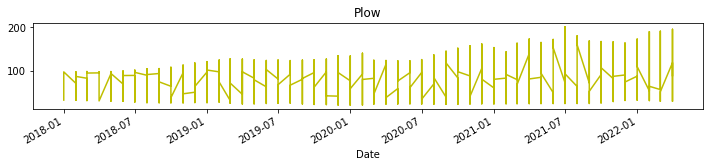

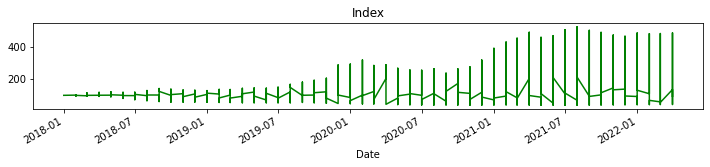

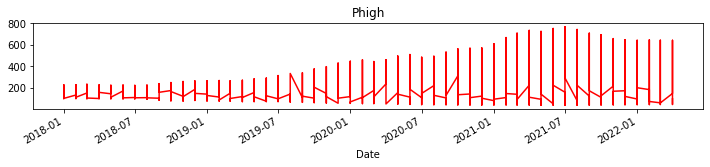

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(3,1,1)
df["Plow"].plot(color="y")
plt.title("Plow")
plt.figure(figsize=(12,6))
plt.subplot(3,1,2)
df["Index"].plot(color="g")
plt.title("Index")
plt.figure(figsize=(12,6))
plt.subplot(3,1,3)
df["Phigh"].plot(color="r")
plt.title("Phigh")

plt.show()

### These graphs showing flow of price with time.
##### We can see till July 2020 Plow was near around 100 but after July 2020 its increased and reached near to 200.

##### We can see Initialy index was around 100 .After July 2018 its increase and reach near to 200 in 2019.From
##### january 2020 its increased drastically and reach above 400 in 2022.

##### We can see Initialy Phigh was around 200 .After July 2018 its increase and reach near to 400 in July 2019.From
##### january 2020 its increased drastically and reach above till 800 in July 2021.







In [16]:
def day_maker(df):
    """ pass a Time series data frame to this function it will
    return a days column."""
    
    days = []
    for d in range(len(df)):
        day=df.index[d]-df.index[0]
        days.append(day.days)
    days = np.array(days)
    return days

In [17]:
df["Days"]=day_maker(df)

In [18]:
df.head()

Index Category        Sub Category       Region   Plow   Index  \
Date                                                                        
2018-01-01         Cement  Cement Price Index  Appalachian  31.52  100.00   
2018-02-01         Cement  Cement Price Index  Appalachian  31.01  100.75   
2018-03-01         Cement  Cement Price Index  Appalachian  30.35  100.87   
2018-04-01         Cement  Cement Price Index  Appalachian  29.61  100.57   
2018-05-01         Cement  Cement Price Index  Appalachian  28.80  102.17   

             Phigh              type  year  day  month  week_of_year  Days  
Date                                                                        
2018-01-01  158.35  Normalized Price  2018    1      1             1     0  
2018-02-01  159.21  Normalized Price  2018    1      2             5    31  
2018-03-01  161.99  Normalized Price  2018    1      3             9    59  
2018-04-01  160.39  Normalized Price  2018    1      4            13    90  
2018-05-01  160.23  Normalized Price  2018    1      5            18   120

In [19]:
df.describe().T

count         mean         std      min        25%       50%  \
Plow          4524.0    78.355802   23.198859    19.51    65.3325    80.585   
Index         4524.0   103.623691   33.392147    38.79    90.9325   100.730   
Phigh         4524.0   140.714052   58.592580    40.85   111.2575   127.565   
year          4524.0  2019.692308    1.264115  2018.00  2019.0000  2020.000   
day           4524.0     1.000000    0.000000     1.00     1.0000     1.000   
month         4524.0     6.192308    3.497850     1.00     3.0000     6.000   
week_of_year  4524.0    25.057692   15.492918     1.00    12.0000    24.500   
Days          4524.0   775.346154  457.006236     0.00   388.2500   775.500   

                    75%      max  
Plow            92.6100   201.44  
Index          112.3725   522.15  
Phigh          157.8325   768.10  
year          2021.0000  2022.00  
day              1.0000     1.00  
month            9.0000    12.00  
week_of_year    39.2500    53.00  
Days          1162.7500  1551.00

### Region Wise analysis

In [20]:
df.groupby("Region")["Plow"].describe()
#Plow: 25th Percentile value, also benchmarked to the Index Baseline
#we can see  mean Plow  for both region is almost same
#count is also need to see

count       mean        std    min     25%    50%     75%  \
Region                                                                    
Appalachian  1872.0  79.012906  22.087244  22.63  67.585  81.14  90.850   
Permian      2652.0  77.891965  23.945751  19.51  61.665  80.23  94.395   

                max  
Region               
Appalachian  201.44  
Permian      170.32

In [21]:
df.groupby("Region")["Plow"].sum()
#Total Plow for Permian region is higher than Appalachian

Region
Appalachian    147912.16
Permian        206569.49
Name: Plow, dtype: float64

<AxesSubplot:xlabel='Region'>

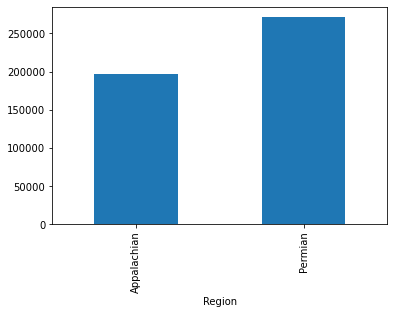

In [82]:
df.groupby("Region")["Index"].sum().plot(kind="bar")

#sum Of Index for both region

In [23]:
df.groupby(["Region","year"])["Plow"].sum()
#Yearly total Plow

Region       year
Appalachian  2018    34666.37
             2019    34333.75
             2020    32777.14
             2021    33668.41
             2022    12466.49
Permian      2018    46853.20
             2019    49292.10
             2020    45346.27
             2021    46866.62
             2022    18211.30
Name: Plow, dtype: float64

<AxesSubplot:xlabel='Region,year'>

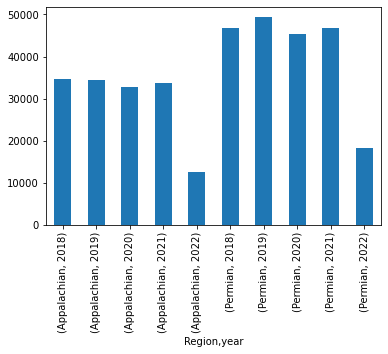

In [86]:
df.groupby(["Region","year"])["Plow"].sum().plot(kind="bar")
#Yearly 25 percentile price with both region
#we can see Permian region is leading 

In [25]:
df.groupby(["Region","year","month"])["Plow"].sum()

Region       year  month
Appalachian  2018  1        2868.37
                   2        2879.92
                   3        2873.80
                   4        2886.81
                   5        2875.43
                   6        2889.89
                   7        2893.05
                   8        2899.84
                   9        2896.60
                   10       2897.02
                   11       2899.64
                   12       2906.00
             2019  1        2904.58
                   2        2892.63
                   3        2885.12
                   4        2866.23
                   5        2855.60
                   6        2863.85
                   7        2838.04
                   8        2837.95
                   9        2844.80
                   10       2833.39
                   11       2850.87
                   12       2860.69
             2020  1        2839.45
                   2        2821.63
                   3        2785.37
   

<AxesSubplot:xlabel='Region,year,month'>

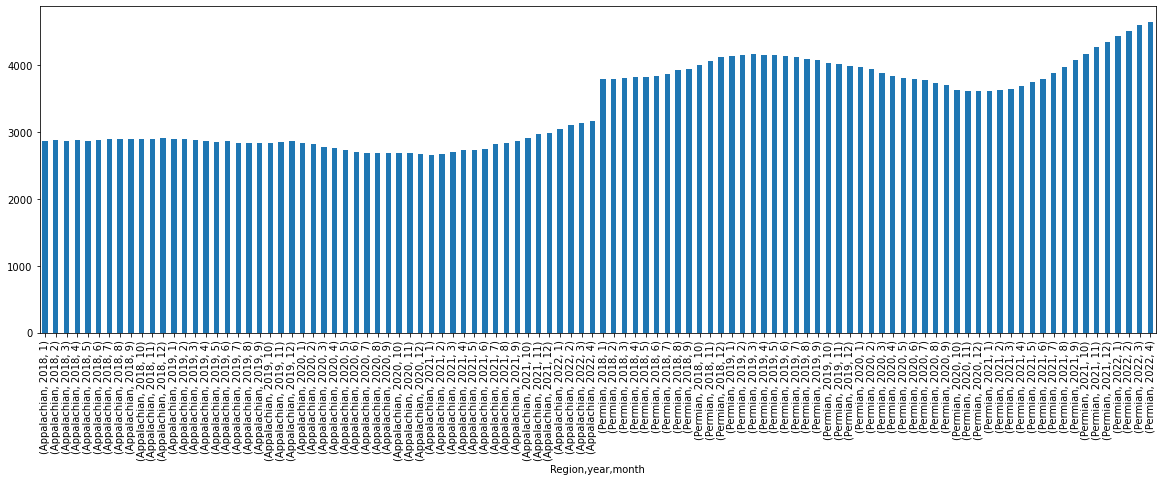

In [85]:
plt.figure(figsize=(20,6))
df.groupby(["Region","year","month"])["Plow"].sum().plot(kind="bar")
#we can see monthly trend for both region and we can see after january 2021 its increasing.

In [27]:
#Similarly we do for index and for phigh

In [28]:
df.groupby("Region")["Index"].describe()
#Mean is quite simmilar for both region  
#There is difference in max of both regions

count        mean        std    min      25%      50%       75%  \
Region                                                                          
Appalachian  1872.0  105.324658  43.572238  49.39  90.8225  100.235  111.3025   
Permian      2652.0  102.423009  23.643091  38.79  91.0500  101.295  112.9675   

                max  
Region               
Appalachian  522.15  
Permian      214.13

In [29]:
df.groupby("Region")["Index"].sum()
#Total Index for Permian region is higher than Appalachian

Region
Appalachian    197167.76
Permian        271625.82
Name: Index, dtype: float64

<AxesSubplot:xlabel='Region'>

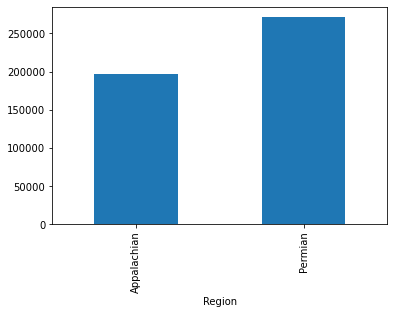

In [30]:
df.groupby("Region")["Index"].sum().plot(kind="bar")
#Total Index for Permian region is higher than Appalachian

In [31]:
df.groupby(["Region","year"])["Index"].sum()

Region       year
Appalachian  2018    43657.62
             2019    44720.53
             2020    44404.76
             2021    47355.34
             2022    17029.51
Permian      2018    62887.02
             2019    64961.69
             2020    59761.70
             2021    60809.56
             2022    23205.85
Name: Index, dtype: float64

<AxesSubplot:xlabel='Region,year'>

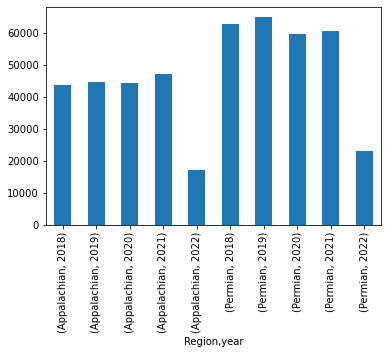

In [32]:
df.groupby(["Region","year"])["Index"].sum().plot(kind="bar")
#yearly trend is quite simmilar to yearly trendof Plow

In [33]:
df.groupby(["Region","year","month"])["Index"].sum()

Region       year  month
Appalachian  2018  1        3600.00
                   2        3597.12
                   3        3605.68
                   4        3613.18
                   5        3626.38
                   6        3646.46
                   7        3632.07
                   8        3635.17
                   9        3673.07
                   10       3661.22
                   11       3678.66
                   12       3688.61
             2019  1        3686.45
                   2        3718.96
                   3        3709.76
                   4        3696.29
                   5        3669.29
                   6        3706.11
                   7        3702.97
                   8        3715.02
                   9        3758.27
                   10       3722.71
                   11       3769.81
                   12       3864.89
             2020  1        3850.21
                   2        3811.96
                   3        3745.30
   

<AxesSubplot:xlabel='Region,year,month'>

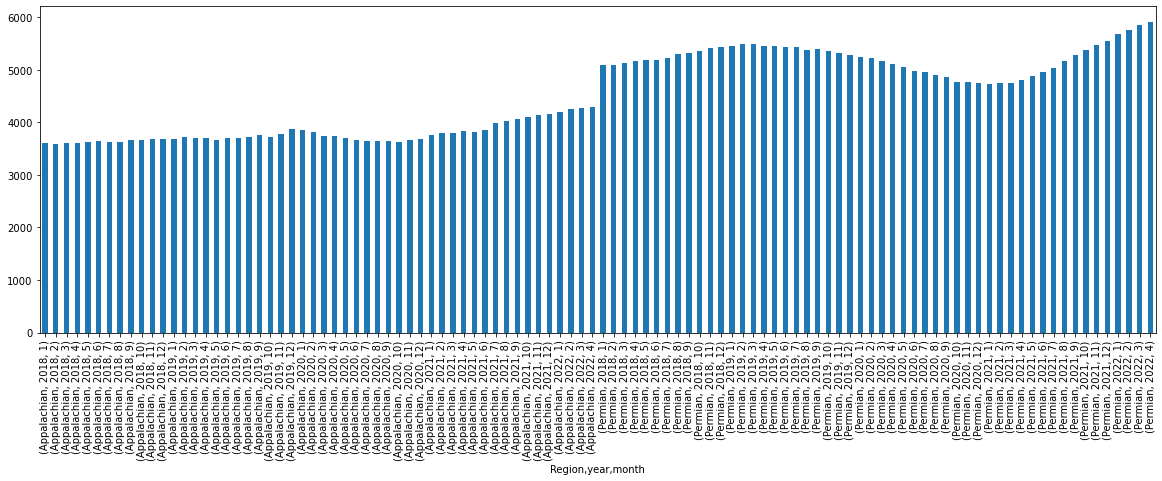

In [34]:
plt.figure(figsize=(20,6))
df.groupby(["Region","year","month"])["Index"].sum().plot(kind="bar")
#Monthly trend is quite simmilar as plow monthly trend 

In [35]:
df.groupby("Region")["Phigh"].describe()
#Mean is quite simmilar for both region  
#There is difference in count of both regions

count        mean        std    min       25%      50%  \
Region                                                                 
Appalachian  1872.0  146.918093  76.893559  60.76  107.8700  124.680   
Permian      2652.0  136.334729  40.472699  40.85  112.7675  129.855   

                  75%     max  
Region                         
Appalachian  168.4825  768.10  
Permian      153.5100  358.96

In [36]:
df.groupby("Region")["Phigh"].sum()
#Total Phigh for Permian region is higher than Appalachian

Region
Appalachian    275030.67
Permian        361559.70
Name: Phigh, dtype: float64

<AxesSubplot:xlabel='Region'>

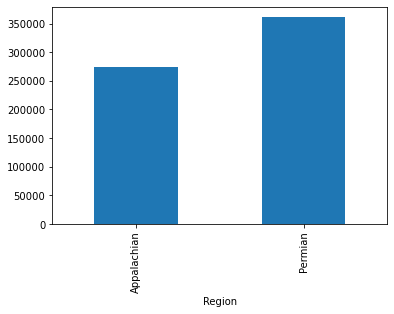

In [37]:
df.groupby("Region")["Phigh"].sum().plot(kind="bar")


In [38]:
df.groupby(["Region","year"])["Phigh"].sum()

Region       year
Appalachian  2018    58942.84
             2019    61731.19
             2020    64215.43
             2021    67271.67
             2022    22869.54
Permian      2018    83277.66
             2019    86446.82
             2020    80563.03
             2021    81213.28
             2022    30058.91
Name: Phigh, dtype: float64

<AxesSubplot:xlabel='Region,year'>

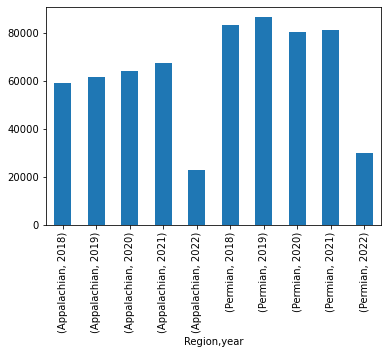

In [39]:
df.groupby(["Region","year"])["Phigh"].sum().plot(kind="bar")
#Yearly Phigh trend is simmilar as Plow and Index

In [40]:
df.groupby(["Region","year","month"])["Phigh"].sum()

Region       year  month
Appalachian  2018  1        4821.01
                   2        4820.50
                   3        4842.72
                   4        4856.16
                   5        4853.15
                   6        4883.33
                   7        4891.40
                   8        4947.72
                   9        5015.67
                   10       4980.01
                   11       5011.43
                   12       5019.74
             2019  1        5001.23
                   2        5028.08
                   3        5043.65
                   4        5088.24
                   5        5059.73
                   6        5083.63
                   7        5065.90
                   8        5136.89
                   9        5205.93
                   10       5299.41
                   11       5323.62
                   12       5394.88
             2020  1        5395.87
                   2        5402.92
                   3        5329.49
   

<AxesSubplot:xlabel='Region,year,month'>

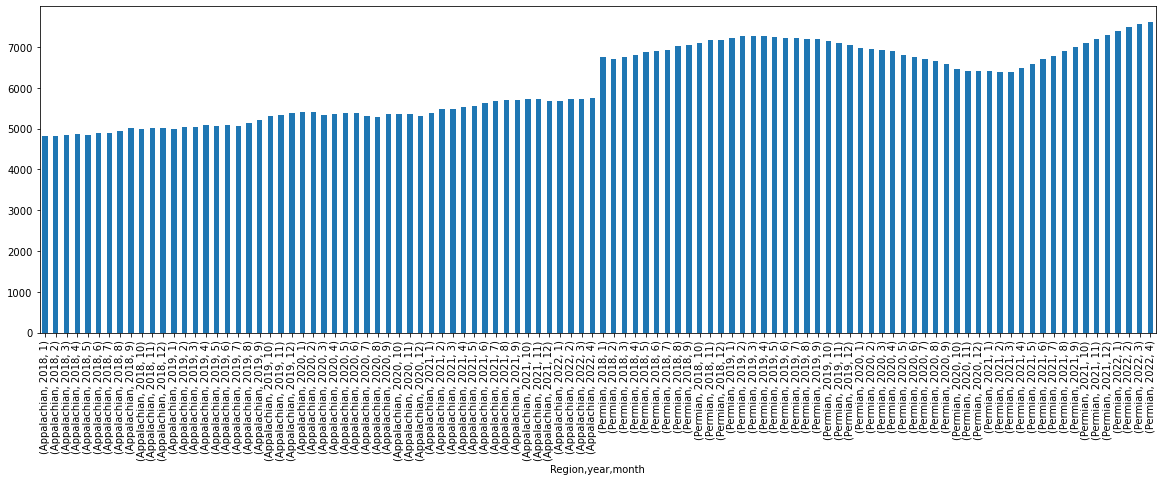

In [41]:
plt.figure(figsize=(20,6))
df.groupby(["Region","year","month"])["Phigh"].sum().plot(kind="bar")
#Monthly Phigh trend is simmilar as Plow and Index

In [42]:
#Lets go more grannular level
#lets understand category column
df["Index Category"].value_counts()

OCTG                        1196
Chemical                     780
Line Pipe                    676
Surface Ball Valves          416
Drilling Operations          312
Proppant                     312
Fluid Hauling & Disposal     312
Cement                       208
Compression                  104
Drilling Mud                 104
Labor                        104
Name: Index Category, dtype: int64

In [43]:
pd.crosstab(df.Region,df["Index Category"])
#we can see counts of different categories for Both region
#"Cement","Chemical","Fluid Hauling & Disposal","Line pipe" and OCTG count in Permian region is higher than Appalachian


Index Category  Cement  Chemical  Compression  Drilling Mud  \
Region                                                        
Appalachian         52       364           52            52   
Permian            156       416           52            52   

Index Category  Drilling Operations  Fluid Hauling & Disposal  Labor  \
Region                                                                 
Appalachian                     156                       104     52   
Permian                         156                       208     52   

Index Category  Line Pipe  OCTG  Proppant  Surface Ball Valves  
Region                                                          
Appalachian           260   416       156                  208  
Permian               416   780       156                  208

In [44]:
df.groupby(["Region","Index Category"])["Plow"].sum()
#Plow of index Categories for both region

Region       Index Category          
Appalachian  Cement                       1712.86
             Chemical                    26963.33
             Compression                  4335.69
             Drilling Mud                 5787.70
             Drilling Operations         13397.80
             Fluid Hauling & Disposal     6207.74
             Labor                        4515.09
             Line Pipe                   22292.76
             OCTG                        36250.90
             Proppant                    10180.42
             Surface Ball Valves         16267.87
Permian      Cement                       5093.27
             Chemical                    31533.66
             Compression                  2571.66
             Drilling Mud                 3605.66
             Drilling Operations         13553.54
             Fluid Hauling & Disposal    16295.71
             Labor                        2242.71
             Line Pipe                   36033.97
            

<AxesSubplot:xlabel='Region,year,Index Category'>

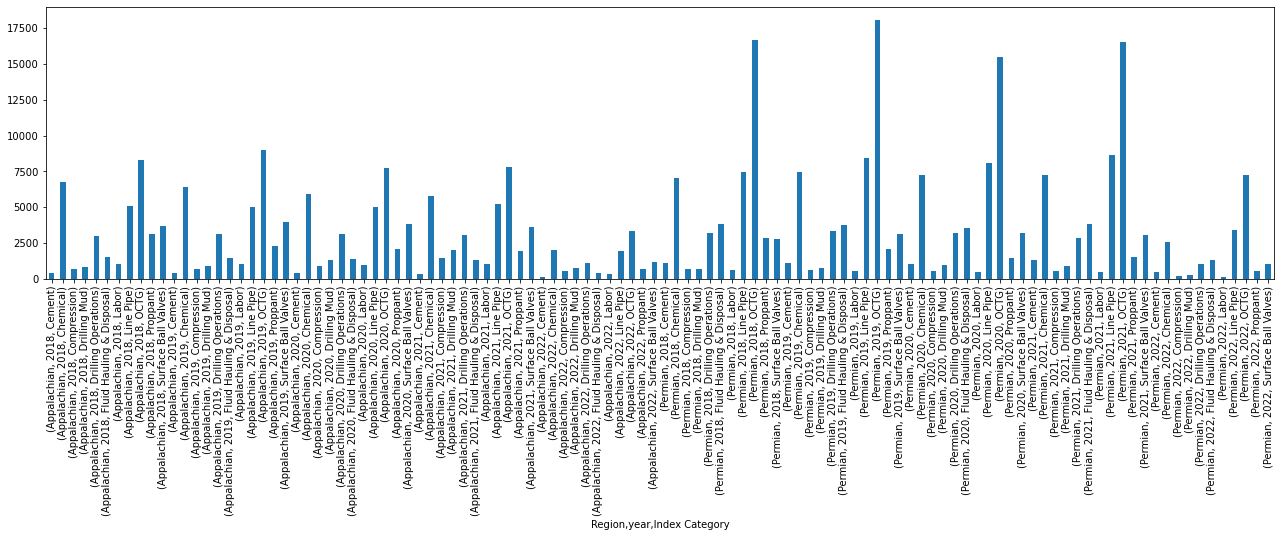

In [45]:
plt.figure(figsize=(22,5))
df.groupby(["Region","year","Index Category"])["Plow"].sum().plot(kind="bar")
#Plow of index Categories for both region
#OCTG -Oil Country Tubular Goods-is the highest price for both region for every year

In [46]:
df.groupby(["Region","Index Category"])["Index"].sum()

Region       Index Category          
Appalachian  Cement                       4137.22
             Chemical                    34645.67
             Compression                  7442.22
             Drilling Mud                13727.36
             Drilling Operations         16009.55
             Fluid Hauling & Disposal     9584.93
             Labor                        5096.18
             Line Pipe                   26966.69
             OCTG                        44018.69
             Proppant                    11372.45
             Surface Ball Valves         24166.80
Permian      Cement                      13824.74
             Chemical                    43375.02
             Compression                  4011.39
             Drilling Mud                 7501.33
             Drilling Operations         16133.73
             Fluid Hauling & Disposal    19387.33
             Labor                        4389.66
             Line Pipe                   47641.43
            

<AxesSubplot:xlabel='Region,year,Index Category'>

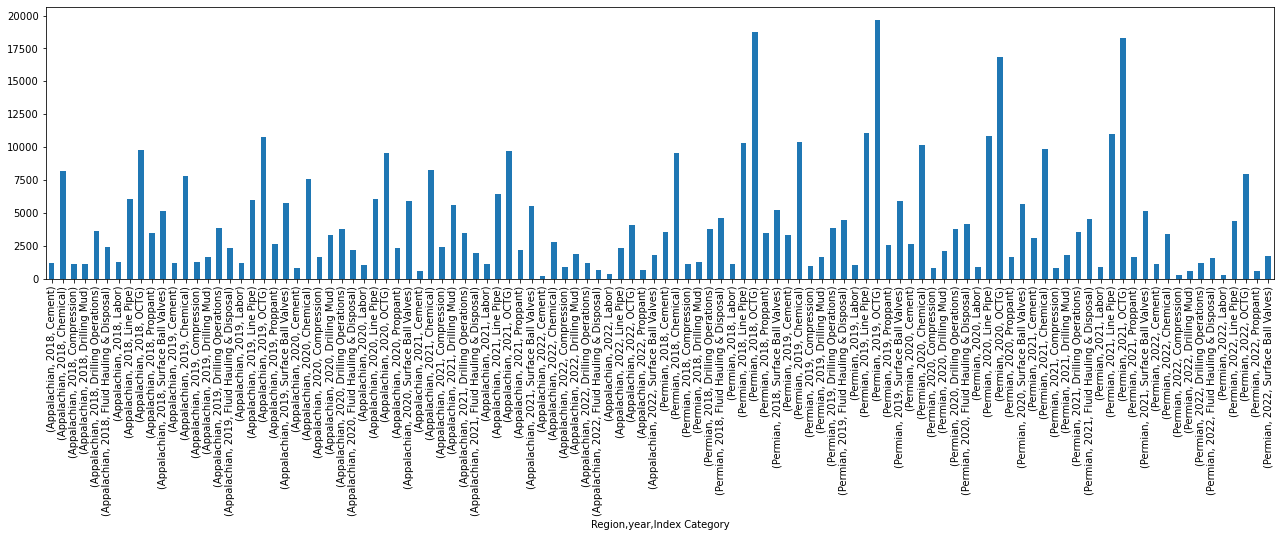

In [47]:
plt.figure(figsize=(22,5))
df.groupby(["Region","year","Index Category"])["Index"].sum().plot(kind="bar")
#Chemical and OCTG is Category with highest 

In [48]:
plt.figure(figsize=(22,5))
df.groupby(["Region","year","Index Category"])["Phigh"].sum()
#Chemical and OCTG is Category with highest 

Region       year  Index Category          
Appalachian  2018  Cement                       1984.72
                   Chemical                     9987.25
                   Compression                  2432.48
                   Drilling Mud                 1894.00
                   Drilling Operations          4017.18
                   Fluid Hauling & Disposal     3030.43
                   Labor                        1710.74
                   Line Pipe                    7555.14
                   OCTG                        14204.50
                   Proppant                     3995.46
                   Surface Ball Valves          8130.94
             2019  Cement                       2098.00
                   Chemical                    10485.26
                   Compression                  2573.21
                   Drilling Mud                 3057.49
                   Drilling Operations          4252.65
                   Fluid Hauling & Disposal     3115.21
    

<Figure size 1584x360 with 0 Axes>

<AxesSubplot:xlabel='Region,year,Index Category'>

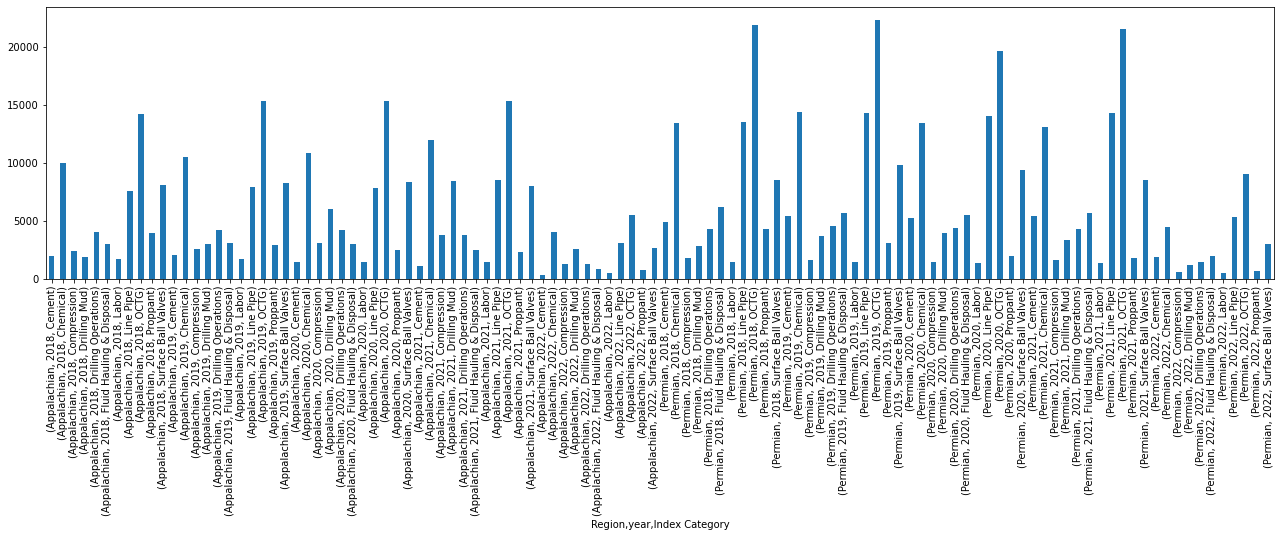

In [49]:
plt.figure(figsize=(22,5))
df.groupby(["Region","year","Index Category"])["Phigh"].sum().plot(kind="bar")
#Chemical and OCTG are highest Phigh for every year for both regions

### Monthly Analysis

<AxesSubplot:xlabel='Region,month,Index Category'>

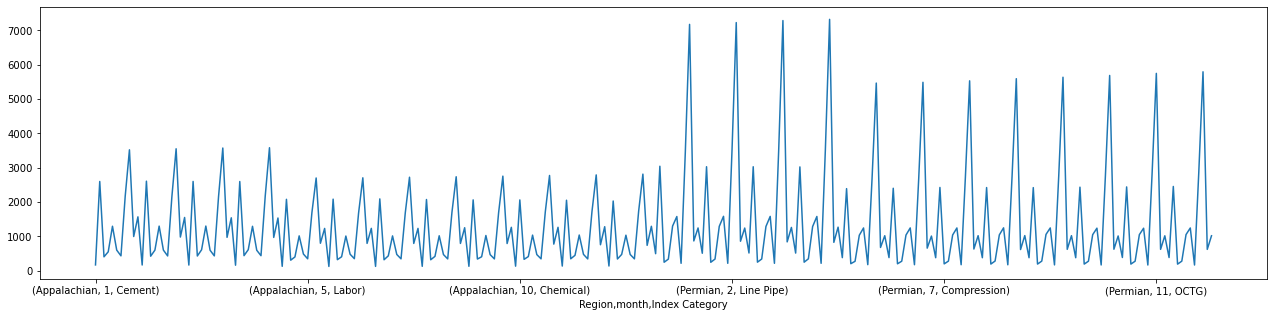

In [50]:
plt.figure(figsize=(22,5))
df.groupby(["Region","month","Index Category"])["Plow"].sum().plot(kind="line")
#Line Pipe ,octg compression cost is high


<AxesSubplot:xlabel='Region,month,Index Category'>

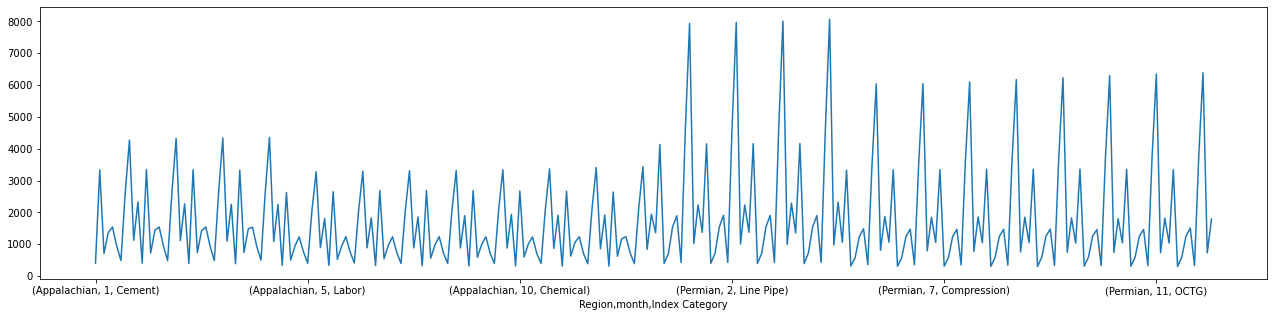

In [51]:
plt.figure(figsize=(22,5))
df.groupby(["Region","month","Index Category"])["Index"].sum().plot(kind="line")
#Line Pipe ,octg compression cost is high

<AxesSubplot:xlabel='Region,month,Index Category'>

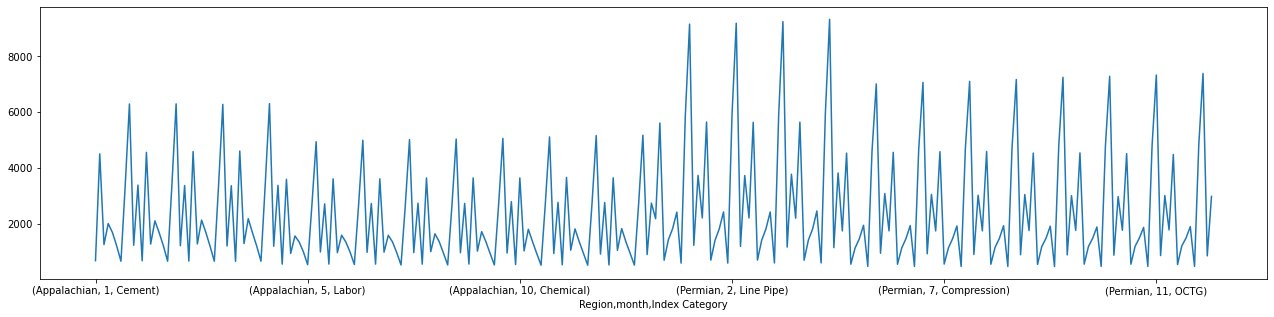

In [52]:
plt.figure(figsize=(22,5))
df.groupby(["Region","month","Index Category"])["Phigh"].sum().plot(kind="line")
#Line Pipe ,octg compression cost is high
#All three categories trend is very simmilar

In [53]:
## We can see common trend for all three Price Index . Line Pipe cost is highest 

<AxesSubplot:xlabel='Index Category', ylabel='total_index'>

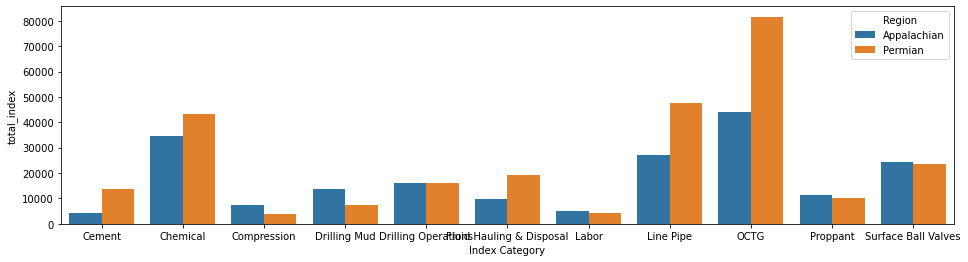

In [54]:
dsf = df.groupby(['Region', 'Index Category']).agg(total_index=("Index", 'sum'))
dsf=dsf.reset_index()
plt.figure(figsize=(16,4))
sns.barplot(x="Index Category",
           y="total_index",
           hue="Region",
           data=dsf)

#Category totalimdex for both region

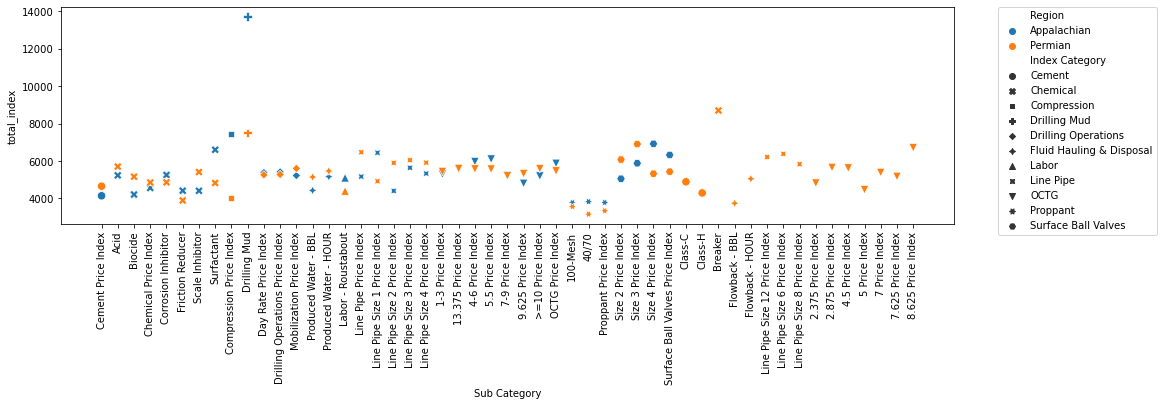

In [88]:
dsf = df.groupby(['Region', 'Index Category',"Sub Category"]).agg(total_index=("Index", 'sum'))
dsf=dsf.reset_index()
plt.figure(figsize=(16,4))
sns.scatterplot(x="Sub Category",
           y="total_index",
           hue="Region",
           style="Index Category",
           s=70,
             
           data=dsf)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

#With Below plot we can extract many insights like...
#1. Drilling Mud total Index is very high for Applancian region.
#2. Also we can see difference in total_index of compression Price Index(sub Category) in compression category
#for both regions.
#3. Some Sub Categories are only exists in Permian region like (Class-C and Class H in cement category,Breaker In Chemical
# which total index is very high ) etc.
#4. Rest all sub categories total index is quite simmilar.


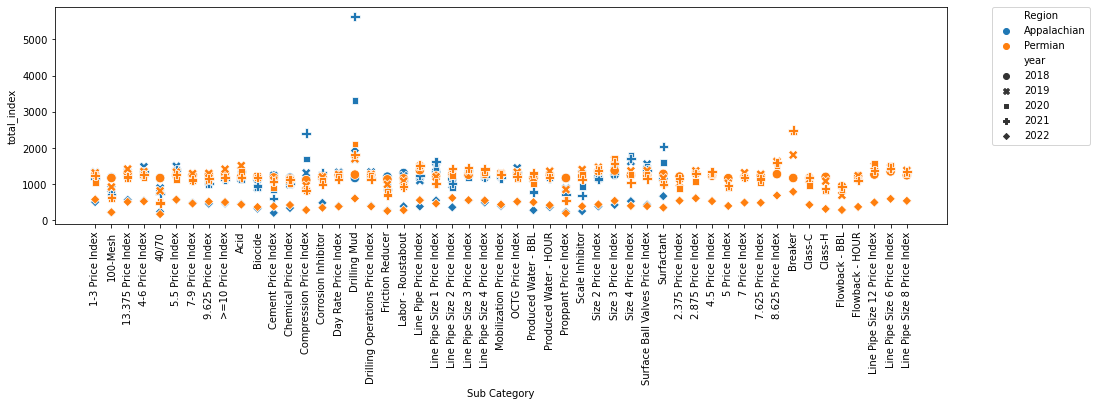

In [56]:
dsf = df.groupby(['Region', 'year',"Sub Category"]).agg(total_index=("Index", 'sum'))
dsf=dsf.reset_index()
plt.figure(figsize=(16,4))
sns.scatterplot(x="Sub Category",
           y="total_index",
           hue="Region",
           style="year",
           s=90,
             
           data=dsf)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

#1.Drilling Mud total index is very high for year 2021 for applancian region.
#2.Compression Price Index is also increased in 2020 and 2021 for Aplancian region.
#3. Surfactank is also increased in 2020 and 2021 for  Aplancian region.


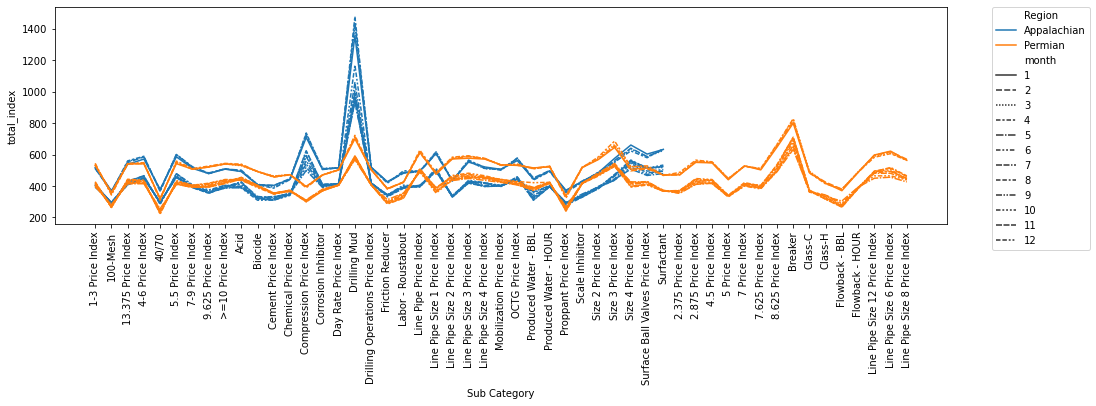

In [57]:
dsf = df.groupby(['Region', 'month',"Sub Category"]).agg(total_index=("Index", 'sum'))
dsf=dsf.reset_index()
plt.figure(figsize=(16,4))
sns.lineplot(x="Sub Category",
           y="total_index",
           hue="Region",
           style="month",
           #s=90,
             
           data=dsf)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

#Driling mud total index increase in first four months of the year for Applancian region

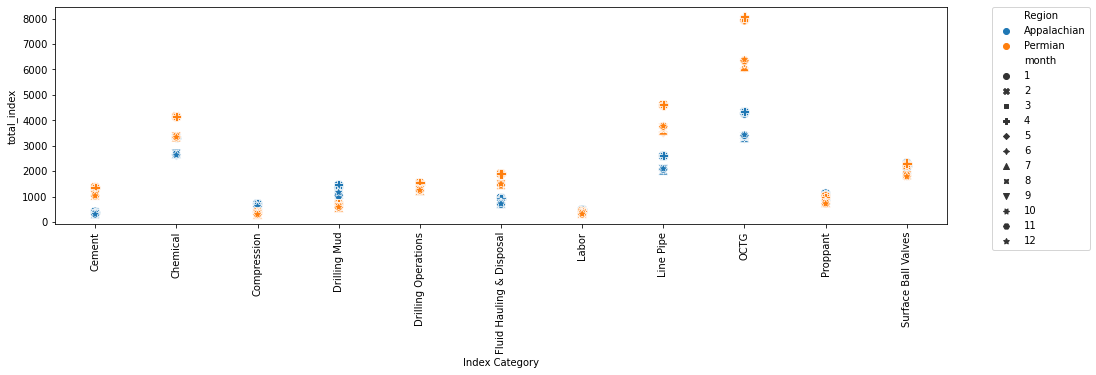

In [58]:
dsf = df.groupby(['Region', 'month',"Index Category"]).agg(total_index=("Index", 'sum'))
dsf=dsf.reset_index()
plt.figure(figsize=(16,4))
sns.scatterplot(x="Index Category",
           y="total_index",
           hue="Region",
           style="month",
           s=90,
             
           data=dsf)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

#OCTG cost is very high for first four months

In [59]:
# from above analysis OCTG ,Line Pipe ,Chemiacl and Surface Ball valves are 4 major categories

In [60]:
#Forcasting the data

In [63]:
from prophet import Prophet
#importing Model

In [64]:
m=Prophet()

In [65]:
df.head()

Index Category        Sub Category       Region   Plow   Index  \
Date                                                                        
2018-01-01         Cement  Cement Price Index  Appalachian  31.52  100.00   
2018-02-01         Cement  Cement Price Index  Appalachian  31.01  100.75   
2018-03-01         Cement  Cement Price Index  Appalachian  30.35  100.87   
2018-04-01         Cement  Cement Price Index  Appalachian  29.61  100.57   
2018-05-01         Cement  Cement Price Index  Appalachian  28.80  102.17   

             Phigh              type  year  day  month  week_of_year  Days  
Date                                                                        
2018-01-01  158.35  Normalized Price  2018    1      1             1     0  
2018-02-01  159.21  Normalized Price  2018    1      2             5    31  
2018-03-01  161.99  Normalized Price  2018    1      3             9    59  
2018-04-01  160.39  Normalized Price  2018    1      4            13    90  
2018-05-01  160.23  Normalized Price  2018    1      5            18   120

In [66]:
df.reset_index(inplace=True)

In [67]:
df

Date            Index Category                     Sub Category  \
0    2018-01-01                    Cement               Cement Price Index   
1    2018-02-01                    Cement               Cement Price Index   
2    2018-03-01                    Cement               Cement Price Index   
3    2018-04-01                    Cement               Cement Price Index   
4    2018-05-01                    Cement               Cement Price Index   
5    2018-06-01                    Cement               Cement Price Index   
6    2018-07-01                    Cement               Cement Price Index   
7    2018-08-01                    Cement               Cement Price Index   
8    2018-09-01                    Cement               Cement Price Index   
9    2018-10-01                    Cement               Cement Price Index   
10   2018-11-01                    Cement               Cement Price Index   
11   2018-12-01                    Cement               Cement Price Index   
12   2019-01-01                    Cement               Cement Price Index   
13   2019-02-01                    Cement               Cement Price Index   
14   2019-03-01                    Cement               Cement Price Index   
15   2019-04-01                    Cement               Cement Price Index   
16   2019-05-01                    Cement               Cement Price Index   
17   2019-06-01                    Cement               Cement Price Index   
18   2019-07-01                    Cement               Cement Price Index   
19   2019-08-01                    Cement               Cement Price Index   
20   2019-09-01                    Cement               Cement Price Index   
21   2019-10-01                    Cement               Cement Price Index   
22   2019-11-01                    Cement               Cement Price Index   
23   2019-12-01                    Cement               Cement Price Index   
24   2020-01-01                    Cement               Cement Price Index   
25   2020-02-01                    Cement               Cement Price Index   
26   2020-03-01                    Cement               Cement Price Index   
27   2020-04-01                    Cement               Cement Price Index   
28   2020-05-01                    Cement               Cement Price Index   
29   2020-06-01                    Cement               Cement Price Index   
30   2020-07-01                    Cement               Cement Price Index   
31   2020-08-01                    Cement               Cement Price Index   
32   2020-09-01                    Cement               Cement Price Index   
33   2020-10-01                    Cement               Cement Price Index   
34   2020-11-01                    Cement               Cement Price Index   
35   2020-12-01                    Cement               Cement Price Index   
36   2021-01-01                    Cement               Cement Price Index   
37   2021-02-01                    Cement               Cement Price Index   
38   2021-03-01                    Cement               Cement Price Index   
39   2021-04-01                    Cement               Cement Price Index   
40   2021-05-01                    Cement               Cement Price Index   
41   2021-06-01                    Cement               Cement Price Index   
42   2021-07-01                    Cement               Cement Price Index   
43   2021-08-01                    Cement               Cement Price Index   
44   2021-09-01                    Cement               Cement Price Index   
45   2021-10-01                    Cement               Cement Price Index   
46   2021-11-01                    Cement               Cement Price Index   
47   2021-12-01                    Cement               Cement Price Index   
48   2022-01-01                    Cement               Cement Price Index   
49   2022-02-01                    Cement               Cement Price Index   
50   2022-03-01                  

In [68]:
ndf=df[["Date","Index"]]

In [69]:
ndf

Date   Index
0    2018-01-01  100.00
1    2018-02-01  100.75
2    2018-03-01  100.87
3    2018-04-01  100.57
4    2018-05-01  102.17
5    2018-06-01  106.33
6    2018-07-01  101.60
7    2018-08-01  102.33
8    2018-09-01  103.72
9    2018-10-01  104.43
10   2018-11-01  107.07
11   2018-12-01  106.60
12   2019-01-01  106.36
13   2019-02-01  109.45
14   2019-03-01  106.01
15   2019-04-01  106.82
16   2019-05-01  107.12
17   2019-06-01  106.52
18   2019-07-01  104.18
19   2019-08-01  101.34
20   2019-09-01   97.36
21   2019-10-01   98.55
22   2019-11-01   97.38
23   2019-12-01   98.81
24   2020-01-01   92.62
25   2020-02-01   89.99
26   2020-03-01   81.94
27   2020-04-01   76.48
28   2020-05-01   72.66
29   2020-06-01   69.92
30   2020-07-01   66.98
31   2020-08-01   65.72
32   2020-09-01   61.31
33   2020-10-01   57.33
34   2020-11-01   54.35
35   2020-12-01   52.76
36   2021-01-01   52.48
37   2021-02-01   50.65
38   2021-03-01   50.80
39   2021-04-01   49.39
40   2021-05-01   49.82
41   2021-06-01   49.57
42   2021-07-01   51.26
43   2021-08-01   50.84
44   2021-09-01   50.56
45   2021-10-01   51.43
46   2021-11-01   51.54
47   2021-12-01   51.53
48   2022-01-01   51.88
49   2022-02-01   52.11
50   2022-03-01   52.38
51   2022-04-01   52.58
52   2018-01-01  100.00
53   2018-02-01  101.41
54   2018-03-01  103.14
55   2018-04-01  100.92
56   2018-05-01  100.45
57   2018-06-01  100.06
58   2018-07-01  102.93
59   2018-08-01   99.74
60   2018-09-01   96.89
61   2018-10-01   93.81
62   2018-11-01   92.32
63   2018-12-01   89.41
64   2019-01-01   90.73
65   2019-02-01   89.89
66   2019-03-01   89.52
67   2019-04-01   86.72
68   2019-05-01   84.30
69   2019-06-01   83.17
70   2019-07-01   82.17
71   2019-08-01   81.80
72   2019-09-01   77.06
73   2019-10-01   77.02
74   2019-11-01   74.64
75   2019-12-01   76.44
76   2020-01-01   78.26
77   2020-02-01   79.82
78   2020-03-01   79.70
79   2020-04-01   83.15
80   2020-05-01   84.39
81   2020-06-01   84.72
82   2020-07-01   86.97
83   2020-08-01   86.47
84   2020-09-01   91.88
85   2020-10-01   90.17
86   2020-11-01   89.82
87   2020-12-01   87.77
88   2021-01-01   87.79
89   2021-02-01   88.95
90   2021-03-01   86.73
91   2021-04-01   84.24
92   2021-05-01   80.00
93   2021-06-01   81.22
94   2021-07-01   83.87
95   2021-08-01   83.22
96   2021-09-01   81.34
97   2021-10-01   82.95
98   2021-11-01   88.15
99   2021-12-01   86.10
100  2022-01-01   85.25
101  2022-02-01   86.56
102  2022-03-01   85.40
103  2022-04-01   85.31
104  2018-01-01  100.00
105  2018-02-01  100.00
106  2018-03-01  100.00
107  2018-04-01   99.09
108  2018-05-01   98.82
109  2018-06-01   97.01
110  2018-07-01   95.56
111  2018-08-01   91.86
112  2018-09-01   88.90
113  2018-10-01   86.53
114  2018-11-01   89.68
115  2018-12-01   85.38
116  2019-01-01   83.71
117  2019-02-01   80.60
118  2019-03-01   79.03
119  2019-04-01   76.86
120  2019-05-01   75.03
121  2019-06-01   74.34
122  2019-07-01   73.79
123  2019-08-01   73.35
124  2019-09-01   73.00
125  2019-10-01   71.66
126  2019-11-01   70.58
127  2019-12-01   69.72
128  2020-01-01   70.32
129  2020-02-01   71.71
130  2020-03-01   71.69
131  2020-04-01   74.62
132  2020-05-01   76.06
133  2020-06-01   76.76
134  2020-07-01   78.62
135  2020-08-01   75.78
136  2020-09-01   79.41
137  2020-10-01   76.25
138  2020-11-01   72.67
139  2020-12-01   69.95
140  2021-01-01   74.74
141  2021-02-01   71.19
142  2021-03-01   78.77
143  2021-04-01   75.75
144  2021-05-01   71.69
145  2021-06-01   79.17
146  2021-07-01   85.15
147  2021-08-01   81.80
148  2021-09-01   76.35
149  2021-10-01   82.89
150  2021-11-01   88.13
151  2021-12-01   84.18
152  2022-01-01   78.25
153  2022-02-01   84.87
154  2022-03-01   81.36
155  2022-04-01   80.64
156  2018-01-01  100.00
157  2018-02-01   98.46
158  2018-03-01   99.98
159  2018-04-01  100.31
160  2018-05-01  100.58
161  2018-06-01  100.47
162  2018-07-01  101.22
163  2018-08-01  101.57
164  2018-09-01  101.59
165  2018-10-01  101.60
166

In [70]:
ndf.columns=["ds","y"]

In [71]:
m.fit(ndf)

14:56:00 - cmdstanpy - INFO - Chain [1] start processing
14:56:00 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
future = m.make_future_dataframe(periods=50,freq="M")
future.tail(100)

ds
2   2018-03-01
3   2018-04-01
4   2018-05-01
5   2018-06-01
6   2018-07-01
7   2018-08-01
8   2018-09-01
9   2018-10-01
10  2018-11-01
11  2018-12-01
12  2019-01-01
13  2019-02-01
14  2019-03-01
15  2019-04-01
16  2019-05-01
17  2019-06-01
18  2019-07-01
19  2019-08-01
20  2019-09-01
21  2019-10-01
22  2019-11-01
23  2019-12-01
24  2020-01-01
25  2020-02-01
26  2020-03-01
27  2020-04-01
28  2020-05-01
29  2020-06-01
30  2020-07-01
31  2020-08-01
32  2020-09-01
33  2020-10-01
34  2020-11-01
35  2020-12-01
36  2021-01-01
37  2021-02-01
38  2021-03-01
39  2021-04-01
40  2021-05-01
41  2021-06-01
42  2021-07-01
43  2021-08-01
44  2021-09-01
45  2021-10-01
46  2021-11-01
47  2021-12-01
48  2022-01-01
49  2022-02-01
50  2022-03-01
51  2022-04-01
52  2022-04-30
53  2022-05-31
54  2022-06-30
55  2022-07-31
56  2022-08-31
57  2022-09-30
58  2022-10-31
59  2022-11-30
60  2022-12-31
61  2023-01-31
62  2023-02-28
63  2023-03-31
64  2023-04-30
65  2023-05-31
66  2023-06-30
67  2023-07-31
68  2023-08-31
69  2023-09-30
70  2023-10-31
71  2023-11-30
72  2023-12-31
73  2024-01-31
74  2024-02-29
75  2024-03-31
76  2024-04-30
77  2024-05-31
78  2024-06-30
79  2024-07-31
80  2024-08-31
81  2024-09-30
82  2024-10-31
83  2024-11-30
84  2024-12-31
85  2025-01-31
86  2025-02-28
87  2025-03-31
88  2025-04-30
89  2025-05-31
90  2025-06-30
91  2025-07-31
92  2025-08-31
93  2025-09-30
94  2025-10-31
95  2025-11-30
96  2025-12-31
97  2026-01-31
98  2026-02-28
99  2026-03-31
100 2026-04-30
101 2026-05-31

In [73]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds        yhat  yhat_lower  yhat_upper
97  2026-01-31  186.340626  135.200551  238.047594
98  2026-02-28  185.903568  136.198422  238.004026
99  2026-03-31  187.329237  137.950978  238.667707
100 2026-04-30  189.296009  134.123172  241.116009
101 2026-05-31  191.775715  137.176810  244.588749

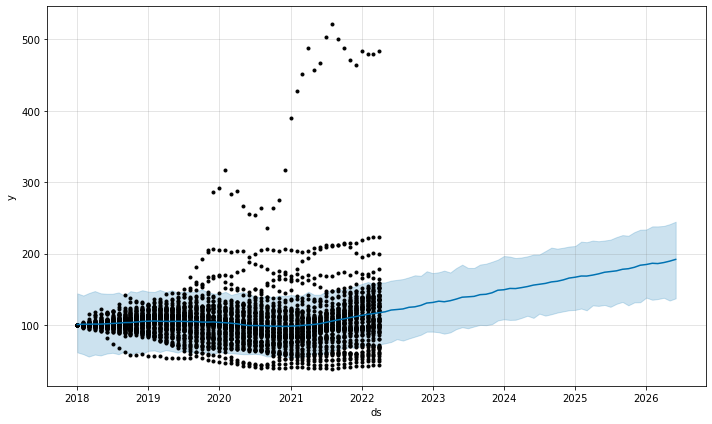

In [74]:
# Forecast
fig1 = m.plot(forecast)

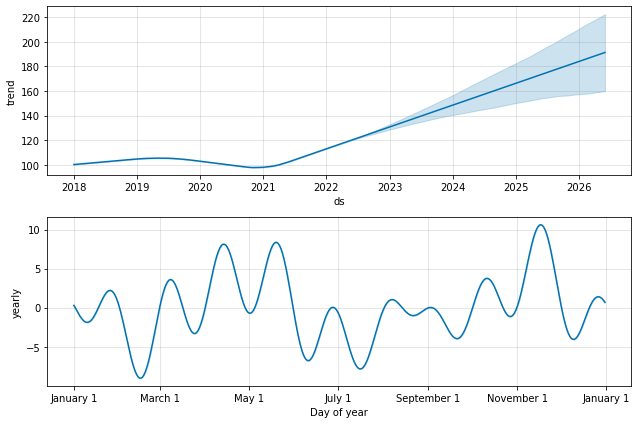

In [75]:

fig2 = m.plot_components(forecast)
#trends-its showing index will increase in future so total well construction cost will also increase in future

In [90]:
from sklearn.metrics import mean_squared_error

In [93]:
metric_df = forecast.set_index('ds')[['yhat']].join(ndf.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
error = mean_squared_error(metric_df.y, metric_df.yhat)
print('The RMSE is {}'. format(np.sqrt(error)))


The RMSE is 33.038418475854
